<a href="https://colab.research.google.com/github/tattwaacharya/DataDataIngestion/blob/master/%5BREVISION_SNB%5D_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Revision Notebook (ungraded)
Predicting Life Expectancy of different Countries Using Pyspark

###Distributed Data Analysis
The aim of this assignment is to generate value and insight from the processing of heterogeneous data. This will be achieved by implementing several analytic methods/techniques/algorithms, evaluating them and comparing the effectiveness of the adopted approaches.

###Objective:
* Derive the insights and visualize the data
* Perform Exploratory Data Analysis  and Data Engineering
* Implement linear regression and Random forest and evaluate using pyspark


###PySpark:
PySpark is the Python API for Apache Spark, an open source, distributed computing framework and set of libraries for real-time, large-scale data processing

##Dataset

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis.

This dataset related to life expectancy and health factors for 193 countries was collected from the WHO data repository. Among all categories of health-related factors only those critical factors were chosen which are more representative.

The final dataset consists of 22 Columns and 2938 rows which i.e. 20 predicting variables. All predicting variables were divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.
Refer [Here](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)

In [ ]:
!pip -qq install pyspark
import pyspark
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql.functions import mean, desc
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Starting a PySpark Session
spark = SparkSession.builder.appName('IntroPySpark').getOrCreate()

In [ ]:
spark

In [ ]:
# Reading in the data
df = spark.read.csv('Life Expectancy Data.csv',header=True, inferSchema=True)

In [ ]:
df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Life expectancy : double (nullable = true)
 |-- Adult Mortality: integer (nullable = true)
 |-- infant deaths: integer (nullable = true)
 |-- Alcohol: double (nullable = true)
 |-- percentage expenditure: double (nullable = true)
 |-- Hepatitis B: integer (nullable = true)
 |-- Measles : integer (nullable = true)
 |--  BMI : double (nullable = true)
 |-- under-five deaths : integer (nullable = true)
 |-- Polio: integer (nullable = true)
 |-- Total expenditure: double (nullable = true)
 |-- Diphtheria : integer (nullable = true)
 |--  HIV/AIDS: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Population: double (nullable = true)
 |--  thinness  1-19 years: double (nullable = true)
 |--  thinness 5-9 years: double (nullable = true)
 |-- Income composition of resources: double (nullable = true)
 |-- Schooling: double (nullable = true)



In [ ]:
type(df)

pyspark.sql.dataframe.DataFrame

In [ ]:
df.columns

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [ ]:
for life in df.head(5):
    print(life)
    print('\n')

Row(Country='Afghanistan', Year=2015, Status='Developing', Life expectancy =65.0, Adult Mortality=263, infant deaths=62, Alcohol=0.01, percentage expenditure=71.27962362, Hepatitis B=65, Measles =1154,  BMI =19.1, under-five deaths =83, Polio=6, Total expenditure=8.16, Diphtheria =65,  HIV/AIDS=0.1, GDP=584.25921, Population=33736494.0,  thinness  1-19 years=17.2,  thinness 5-9 years=17.3, Income composition of resources=0.479, Schooling=10.1)


Row(Country='Afghanistan', Year=2014, Status='Developing', Life expectancy =59.9, Adult Mortality=271, infant deaths=64, Alcohol=0.01, percentage expenditure=73.52358168, Hepatitis B=62, Measles =492,  BMI =18.6, under-five deaths =86, Polio=58, Total expenditure=8.18, Diphtheria =62,  HIV/AIDS=0.1, GDP=612.696514, Population=327582.0,  thinness  1-19 years=17.5,  thinness 5-9 years=17.5, Income composition of resources=0.476, Schooling=10.0)


Row(Country='Afghanistan', Year=2013, Status='Developing', Life expectancy =59.9, Adult Mortality=268

In [ ]:
# Checking the data types of the columns
df.dtypes

[('Country', 'string'),
 ('Year', 'int'),
 ('Status', 'string'),
 ('Life expectancy ', 'double'),
 ('Adult Mortality', 'int'),
 ('infant deaths', 'int'),
 ('Alcohol', 'double'),
 ('percentage expenditure', 'double'),
 ('Hepatitis B', 'int'),
 ('Measles ', 'int'),
 (' BMI ', 'double'),
 ('under-five deaths ', 'int'),
 ('Polio', 'int'),
 ('Total expenditure', 'double'),
 ('Diphtheria ', 'int'),
 (' HIV/AIDS', 'double'),
 ('GDP', 'double'),
 ('Population', 'double'),
 (' thinness  1-19 years', 'double'),
 (' thinness 5-9 years', 'double'),
 ('Income composition of resources', 'double'),
 ('Schooling', 'double')]

In [ ]:
pd.DataFrame(df.take(5), columns = df.columns)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Selecting only numeric variables from the dataset
numeric_features = [t[0] for t in df.dtypes if t[1].startswith("int")]

In [ ]:
df.select(numeric_features).describe().toPandas()

,summary,Year,Adult Mortality,infant deaths,Hepatitis B,Measles,under-five deaths,Polio,Diphtheria
0,count,2938,2928,2938,2385,2938,2938,2919,2919
1,mean,2007.5187202178352,164.79644808743168,30.303948264125257,80.94046121593291,2419.5922396187884,42.0357385976855,82.55018842069202,82.32408359027065
2,stddev,4.613840940258099,124.2920790034219,117.92650131339906,25.070015593018063,11467.27248923461,160.4455484057337,23.428045949468476,23.7169120685726
3,min,2000,1,0,1,0,0,3,2
4,max,2015,723,1800,99,212183,2500,99,99


In [ ]:
# Selecting only numeric variables from the dataset
numeric_features = [t[0] for t in df.dtypes if t[1].startswith("double")]
df.select(numeric_features).describe().toPandas()

,summary,Life expectancy,Alcohol,percentage expenditure,BMI,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,count,2928,2744,2938,2904,2712,2938,2490,2286,2904,2904,2771,2775
1,mean,69.22493169398912,4.6028607871720375,738.2512954533823,38.32124655647373,5.9381895280235915,1.7421034717494939,7483.158469138481,1.2753375120052498E7,4.8397038567493205,4.870316804407711,0.6275510645976166,11.992792792792786
2,stddev,9.523867487824305,4.052412658755658,1987.914858016194,20.044033502562083,2.498319672155633,5.077784531086547,14270.169341515959,6.101209650842794E7,4.420194947144322,4.508882086983007,0.2109035551515931,3.3589197211023554
3,min,36.3,0.01,0.0,1.0,0.37,0.1,1.68135,34.0,0.1,0.1,0.0,0.0
4,max,89.0,17.87,19479.91161,87.3,17.6,50.6,119172.7418,1.293859294E9,27.7,28.6,0.948,20.7


In [ ]:
df_pandas = df.toPandas()

In [ ]:
print('Average Life Expectancy in Pakistan over the years')
df.filter(df["Country"] == "Pakistan").groupBy("Year") .agg(mean("Life expectancy ").alias("average_life")).orderBy(desc("average_life")) .take(100)

Average Life Expectancy in Pakistan over the years


[Row(Year=2015, average_life=66.4),
 Row(Year=2014, average_life=66.2),
 Row(Year=2013, average_life=66.0),
 Row(Year=2012, average_life=65.7),
 Row(Year=2011, average_life=65.5),
 Row(Year=2010, average_life=65.1),
 Row(Year=2009, average_life=64.8),
 Row(Year=2008, average_life=64.6),
 Row(Year=2007, average_life=64.4),
 Row(Year=2006, average_life=64.2),
 Row(Year=2004, average_life=63.7),
 Row(Year=2003, average_life=63.5),
 Row(Year=2002, average_life=63.2),
 Row(Year=2001, average_life=63.0),
 Row(Year=2005, average_life=62.9),
 Row(Year=2000, average_life=62.8)]

In [ ]:
print('Average Life Expectancy in Austria over the years')
df.filter(df["Country"] == "Austria").groupBy("Year") .agg(mean("Life expectancy ").alias("average_life")).orderBy(desc("average_life")) .take(100)

Average Life Expectancy in Austria over the years


[Row(Year=2012, average_life=88.0),
 Row(Year=2011, average_life=88.0),
 Row(Year=2010, average_life=84.0),
 Row(Year=2008, average_life=84.0),
 Row(Year=2009, average_life=82.0),
 Row(Year=2015, average_life=81.5),
 Row(Year=2014, average_life=81.4),
 Row(Year=2013, average_life=81.1),
 Row(Year=2007, average_life=81.0),
 Row(Year=2006, average_life=79.8),
 Row(Year=2005, average_life=79.4),
 Row(Year=2004, average_life=79.3),
 Row(Year=2003, average_life=78.8),
 Row(Year=2002, average_life=78.7),
 Row(Year=2001, average_life=78.6),
 Row(Year=2000, average_life=78.1)]

In [ ]:
print('Average Life Expectancy in Afghanistan over the years')
df.filter(df["Country"] == "Afghanistan").groupBy("Year") .agg(mean("Life expectancy ").alias("average_life")).orderBy(desc("average_life")) .take(100)

Average Life Expectancy in Afghanistan over the years


[Row(Year=2015, average_life=65.0),
 Row(Year=2013, average_life=59.9),
 Row(Year=2014, average_life=59.9),
 Row(Year=2012, average_life=59.5),
 Row(Year=2011, average_life=59.2),
 Row(Year=2010, average_life=58.8),
 Row(Year=2009, average_life=58.6),
 Row(Year=2008, average_life=58.1),
 Row(Year=2007, average_life=57.5),
 Row(Year=2005, average_life=57.3),
 Row(Year=2006, average_life=57.3),
 Row(Year=2004, average_life=57.0),
 Row(Year=2003, average_life=56.7),
 Row(Year=2002, average_life=56.2),
 Row(Year=2001, average_life=55.3),
 Row(Year=2000, average_life=54.8)]

### Exploratory Data Analysis

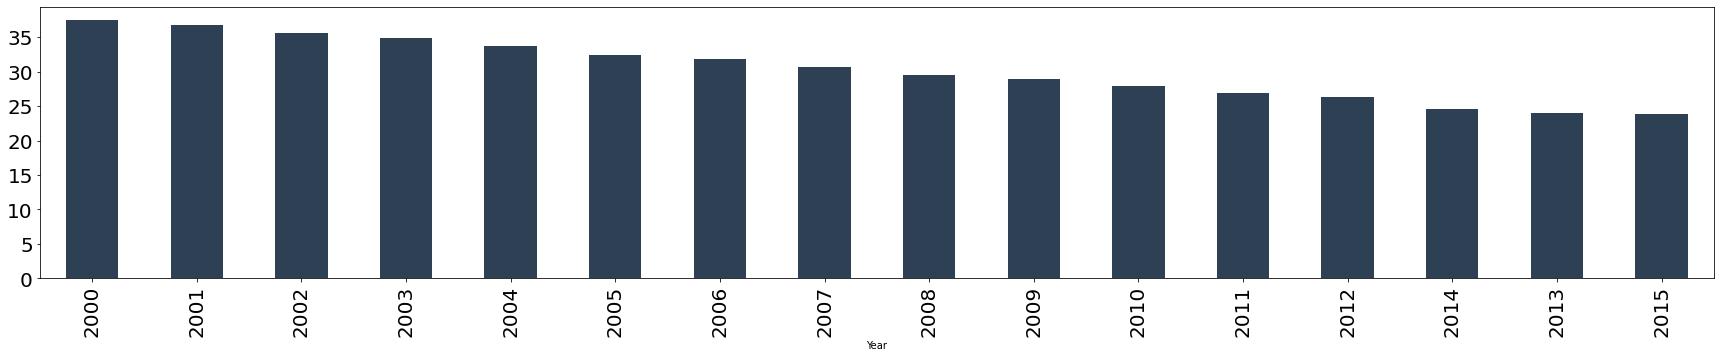

In [ ]:
#Illustration of Infant deaths according to the years
plt.figure(figsize=(30,5))
val=df_pandas.groupby('Year')['infant deaths'].mean()[:20].sort_values(ascending=False).plot(kind='bar',fontsize=20,color='#2e4053')

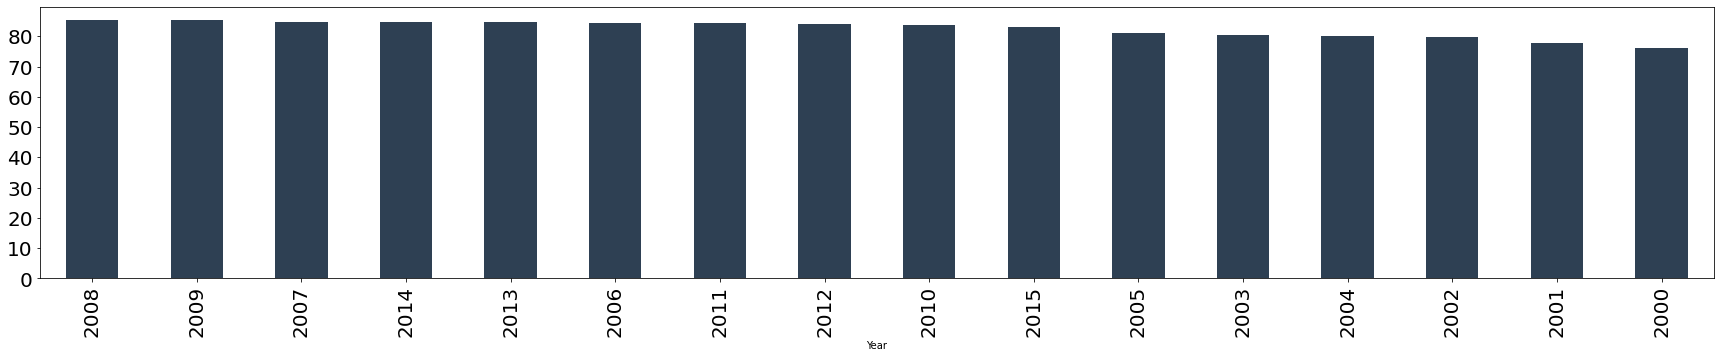

In [ ]:
#Top 20 years with polio.
plt.figure(figsize=(30,5))
val=df_pandas.groupby('Year')['Polio'].mean()[:20].sort_values(ascending=False).plot(kind='bar',fontsize=20,color='#2e4053')

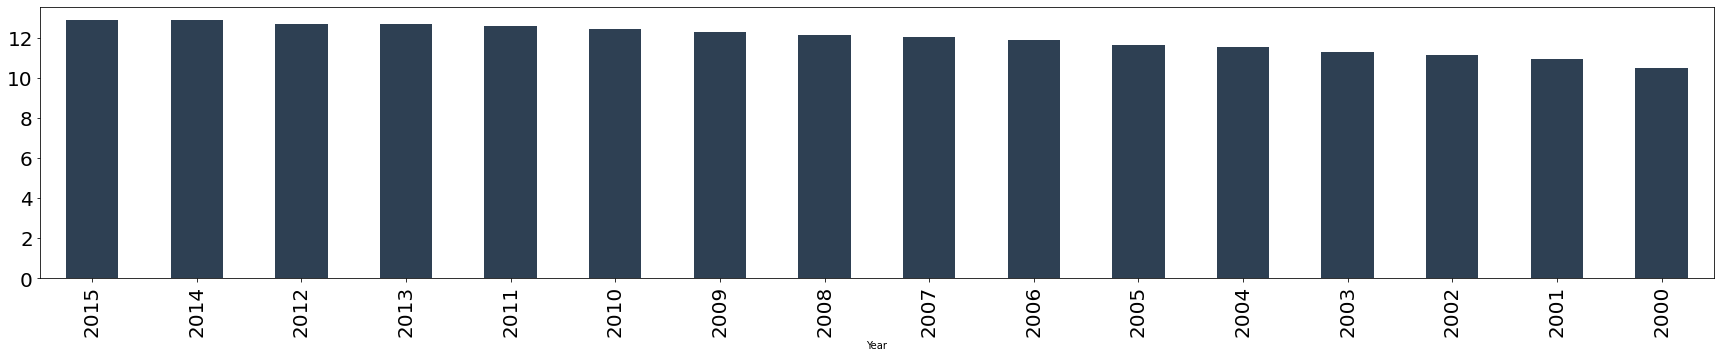

In [ ]:
#Illustration on the basis of Schooling
plt.figure(figsize=(30,5))
val=df_pandas.groupby('Year')['Schooling'].mean()[:20].sort_values(ascending=False).plot(kind='bar',fontsize=20,color='#2e4053')

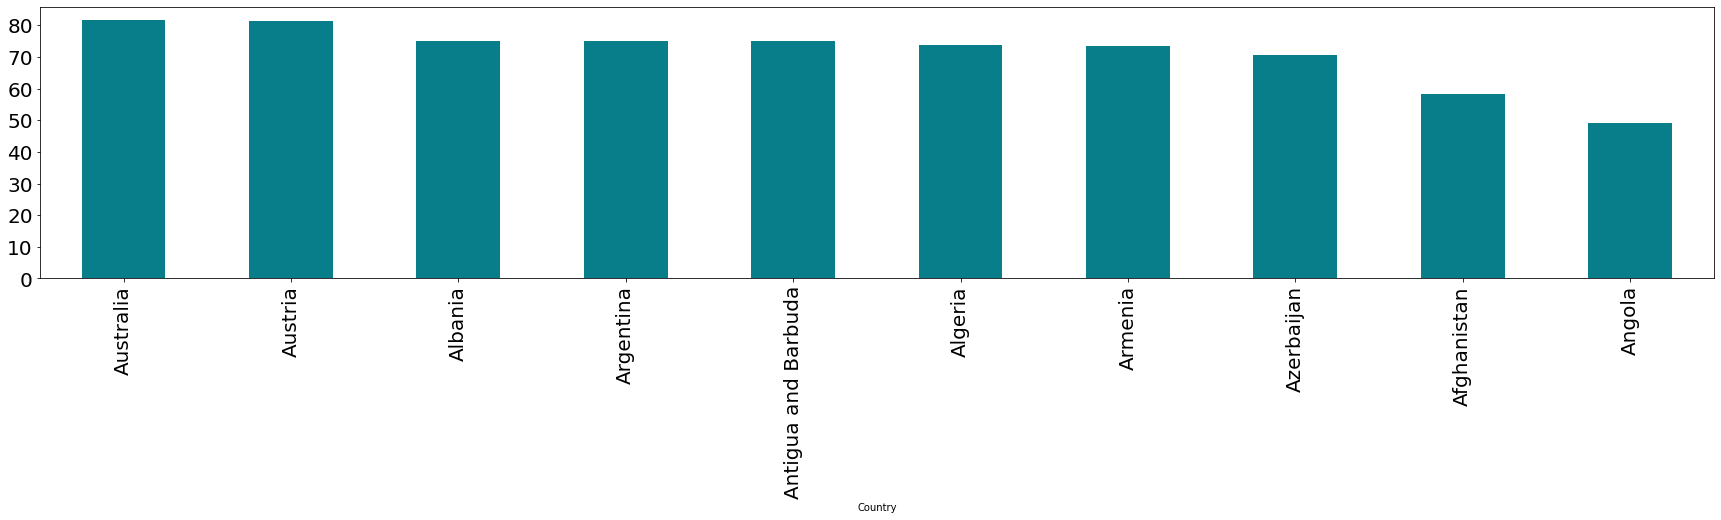

In [ ]:
#Top 10 countries with life-expectancy.
plt.figure(figsize=(30,5))
val=df_pandas.groupby('Country')['Life expectancy '].mean()[:10].sort_values(ascending=False).plot(kind='bar',fontsize=20, color='#087E8B')

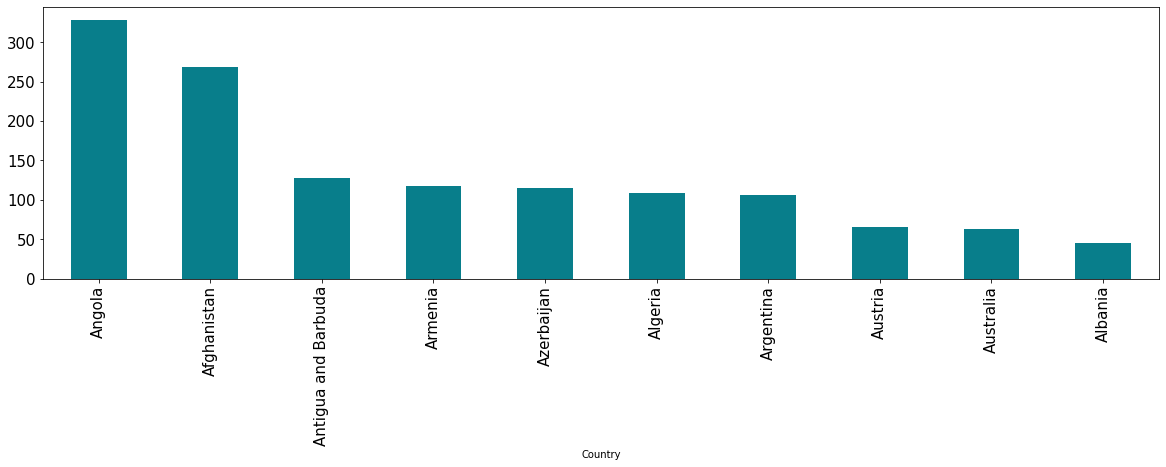

In [ ]:
# Top 10 countries on adult mortality
plt.figure(figsize=(20,5))
val=df_pandas.groupby('Country')['Adult Mortality'].mean()[:10].sort_values(ascending=False).plot(kind='bar',fontsize=15, color='#087E8B')

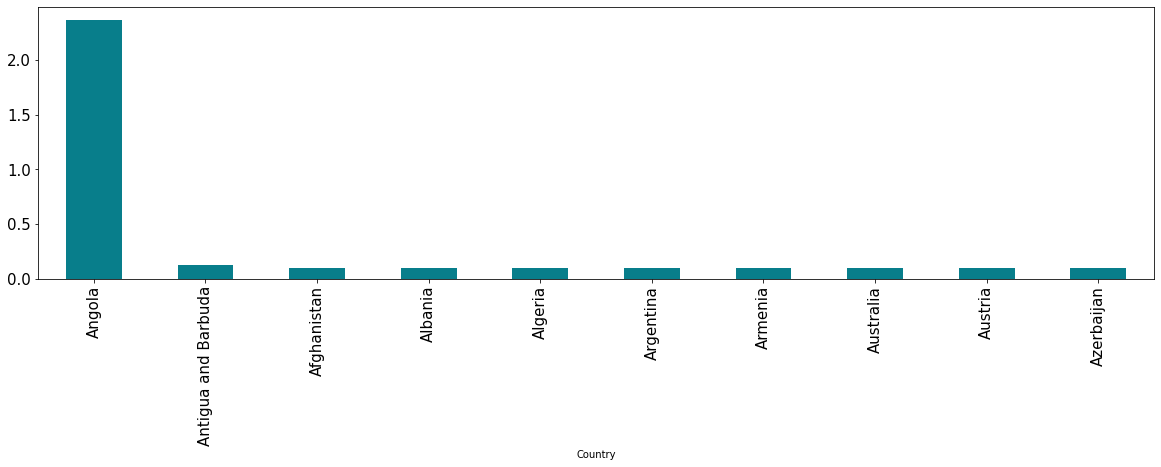

In [ ]:
# Top 10 countries on adult HIV/AIDS
plt.figure(figsize=(20,5))
val=df_pandas.groupby('Country')[' HIV/AIDS'].mean()[:10].sort_values(ascending=False).plot(kind='bar',fontsize=15, color='#087E8B')

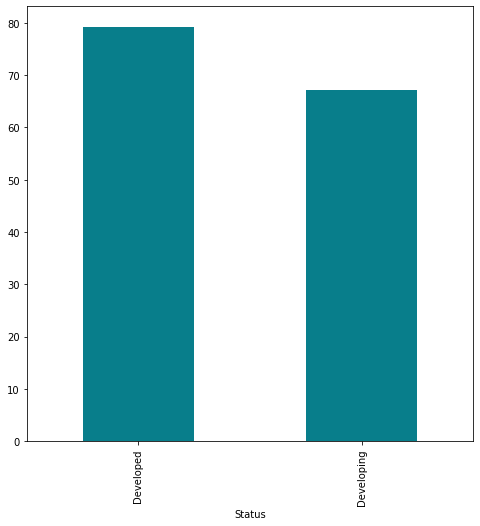

In [ ]:
#Identifying relationship between Country Status and Life Expectancy
plt.figure(figsize=(8,8))
df_pandas.groupby(['Status'])['Life expectancy '].mean().plot(kind='bar', color='#087E8B')

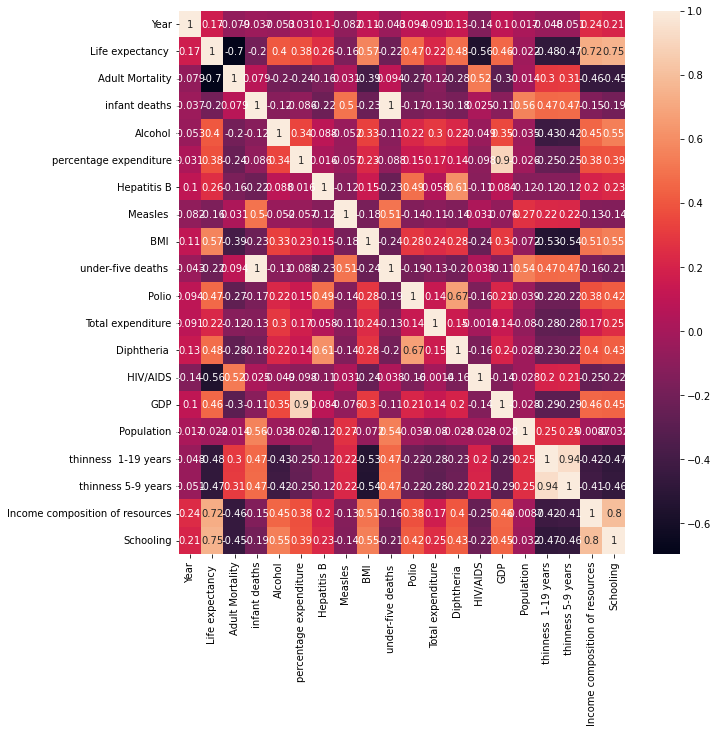

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df_pandas.corr(),annot=True)

In [ ]:
print((df.count(), len(df.columns)))

(2938, 22)


In [ ]:
#Dropping null value rows
df = df.na.drop()

In [ ]:
print((df.count(), len(df.columns)))

(1649, 22)


In [ ]:
df.groupBy('Status').count().show()

+----------+-----+
|    Status|count|
+----------+-----+
| Developed|  242|
|Developing| 1407|
+----------+-----+



##### Transforming the Status Column

In [ ]:
#Transforming the Status Column using StringIndexer
from pyspark.ml.feature import StringIndexer

In [ ]:
indexer = StringIndexer(inputCol='Status',outputCol='Status_cat')

In [ ]:
indexed = indexer.fit(df).transform(df)

In [ ]:
for life in indexed.head(2):
    print(life)
    print('\n')

Row(Country='Afghanistan', Year=2015, Status='Developing', Life expectancy =65.0, Adult Mortality=263, infant deaths=62, Alcohol=0.01, percentage expenditure=71.27962362, Hepatitis B=65, Measles =1154,  BMI =19.1, under-five deaths =83, Polio=6, Total expenditure=8.16, Diphtheria =65,  HIV/AIDS=0.1, GDP=584.25921, Population=33736494.0,  thinness  1-19 years=17.2,  thinness 5-9 years=17.3, Income composition of resources=0.479, Schooling=10.1, Status_cat=0.0)


Row(Country='Afghanistan', Year=2014, Status='Developing', Life expectancy =59.9, Adult Mortality=271, infant deaths=64, Alcohol=0.01, percentage expenditure=73.52358168, Hepatitis B=62, Measles =492,  BMI =18.6, under-five deaths =86, Polio=58, Total expenditure=8.18, Diphtheria =62,  HIV/AIDS=0.1, GDP=612.696514, Population=327582.0,  thinness  1-19 years=17.5,  thinness 5-9 years=17.5, Income composition of resources=0.476, Schooling=10.0, Status_cat=0.0)




### Feature Engineering

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [ ]:
indexed.columns

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'Status_cat']

Create a single vector column using VectorAssembler in PySpark

Refer [Here](https://pyshark.com/vectorassembler-in-pyspark/)

In [ ]:
assembler = VectorAssembler(inputCols=[
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 ' HIV/AIDS',
 'GDP',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'Status_cat'],outputCol='features')

In [ ]:
output = assembler.transform(indexed)

In [ ]:
output.select('features','Life expectancy ').show()

+--------------------+----------------+
|            features|Life expectancy |
+--------------------+----------------+
|[65.0,263.0,62.0,...|            65.0|
|[59.9,271.0,64.0,...|            59.9|
|[59.9,268.0,66.0,...|            59.9|
|[59.5,272.0,69.0,...|            59.5|
|[59.2,275.0,71.0,...|            59.2|
|[58.8,279.0,74.0,...|            58.8|
|[58.6,281.0,77.0,...|            58.6|
|[58.1,287.0,80.0,...|            58.1|
|[57.5,295.0,82.0,...|            57.5|
|[57.3,295.0,84.0,...|            57.3|
|[57.3,291.0,85.0,...|            57.3|
|[57.0,293.0,87.0,...|            57.0|
|[56.7,295.0,87.0,...|            56.7|
|[56.2,3.0,88.0,0....|            56.2|
|[55.3,316.0,88.0,...|            55.3|
|[54.8,321.0,88.0,...|            54.8|
|[77.8,74.0,0.0,4....|            77.8|
|[77.5,8.0,0.0,4.5...|            77.5|
|[77.2,84.0,0.0,4....|            77.2|
|[76.9,86.0,0.0,5....|            76.9|
+--------------------+----------------+
only showing top 20 rows



In [ ]:
type(output)

pyspark.sql.dataframe.DataFrame

### Linear Regression

In [ ]:
final_data = output.select('features','Life expectancy ')

Divide the data into training and testing data

In [ ]:
train_data,test_data = final_data.randomSplit([0.8,0.2])

Describe the train and test data

In [ ]:
train_data.describe().show()

In [ ]:
test_data.describe().show()

Model building using linear regression

Refer [Here](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.regression.LinearRegression.html)

In [ ]:
from pyspark.ml.regression import LinearRegression

In [ ]:
lr = LinearRegression(labelCol='Life expectancy ')

In [ ]:
lrModel = lr.fit(train_data)

In [ ]:
# Print the coefficients and intercept for linear regression
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

#### Evaluation

In [ ]:
test_results = lrModel.evaluate(test_data)

Evaluate the test data using RMSE, MSE and R2 Metrics

In [ ]:
print("RMSE: {}".format(test_results.rootMeanSquaredError))
print("MSE: {}".format(test_results.meanSquaredError))
print("R2: {}".format(test_results.r2))

#### Correlation

In [ ]:
from pyspark.sql.functions import corr

Check Correlation of Life expectancy with infant deaths using corr function

In [ ]:
df.select(corr('Life expectancy ','infant deaths')).show()

Checking Correlation of Life expectancy with HIV/AIDS

In [ ]:
df.select(corr('Life expectancy ',' HIV/AIDS')).show()

Checking Correlation of Life expectancy with Adukt Moortality

In [ ]:
df.select(corr('Life expectancy ','Adult Mortality')).show()

*The above results show negative correlation,negative correlation is a relationship between two variables in which one variable increases as the other decreases, and vice versa. For instance the increase in HIV/AIDS will result in low life expectancy*

### Random Forest Regressor

Model building using Random forest regressor

In [ ]:
from pyspark.ml.regression import RandomForestRegressor

In [ ]:
lr_model2 = RandomForestRegressor(labelCol='Life expectancy ')

Fit the model

In [ ]:
model = lr_model2.fit(train_data)

Predict the model with test data

In [ ]:
predictions = model.transform(test_data)

In [ ]:
predictions.show()

+--------------------+----------------+------------------+
|            features|Life expectancy |        prediction|
+--------------------+----------------+------------------+
|[44.3,723.0,27.0,...|            44.3|  47.1339505859052|
|[44.6,717.0,28.0,...|            44.6|  47.1339505859052|
|[44.8,73.0,25.0,4...|            44.8| 50.48142224665691|
|[46.0,665.0,24.0,...|            46.0|  47.1339505859052|
|[47.1,568.0,3.0,6...|            47.1|47.887085515744616|
|[48.2,632.0,30.0,...|            48.2| 47.38666111222098|
|[48.6,453.0,17.0,...|            48.6| 50.52941382170944|
|[48.7,371.0,84.0,...|            48.7|  51.5763911716585|
|[49.2,446.0,17.0,...|            49.2| 50.52941382170944|
|[49.3,554.0,34.0,...|            49.3| 50.38870348595119|
|[49.6,365.0,78.0,...|            49.6|51.860516254908575|
|[49.7,411.0,25.0,...|            49.7| 51.26333473190001|
|[49.8,396.0,549.0...|            49.8|51.426173804530606|
|[51.1,527.0,4.0,2...|            51.1| 52.0401358445315

Model evaluation using Regression Evaluator

Refer [Here](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.evaluation.RegressionEvaluator.html)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
evaluator = RegressionEvaluator(
    labelCol="Life expectancy ", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

In [ ]:
df.filter(df["Country"] == "Afghanistan").groupBy("Year") .agg(mean("Life expectancy ").alias("average_life")).orderBy(desc("average_life")) .take(100)

## Reference Reading:

https://evidencen.com/predictlifeexpectancy/